# COVID-19 Global Data Tracker
This project analyzes COVID-19 cases, deaths, and vaccination progress in selected countries (Kenya, USA, India). It includes data cleaning, trend analysis, and visualizations to understand the global impact of the pandemic.


- Import and clean COVID-19 global data
- Analyze time trends (cases, deaths, vaccinations)
- Compare metrics across Kenya, USA, and India
- Visualize trends using line and bar charts
- Share insights using data and visuals


 Tools & Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


Data Loading & Initial Exploration

In [2]:
df = pd.read_csv('owid-covid-data.csv')
df.head()
df.columns
df.isnull().sum()


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

 Data Cleaning

In [3]:
df['date'] = pd.to_datetime(df['date'])
countries = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries)]
df_filtered = df_filtered[['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations', 'people_vaccinated_per_hundred']]
df_filtered = df_filtered.dropna(subset=['date', 'total_cases'])
df_filtered.fillna(0, inplace=True)


 Exploratory Data Analysis (EDA)
✅ Line Chart: Total Deaths Over Time

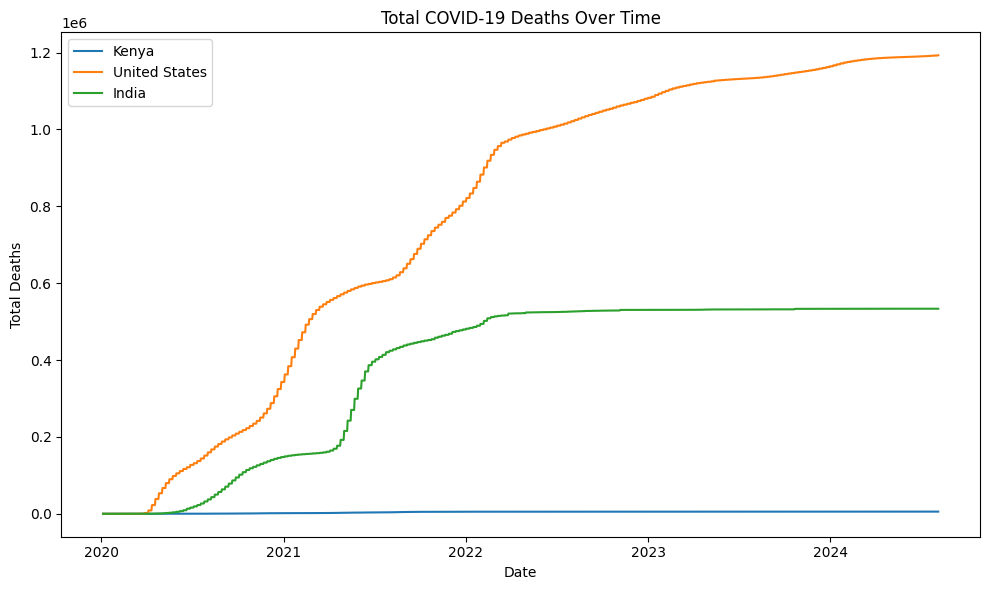

In [4]:
plt.figure(figsize=(10,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()


✅ Line Chart: New Cases Over Time
✅ Death Rate Over Time (total_deaths / total_cases)
✅ Vaccination Progress Line Chart

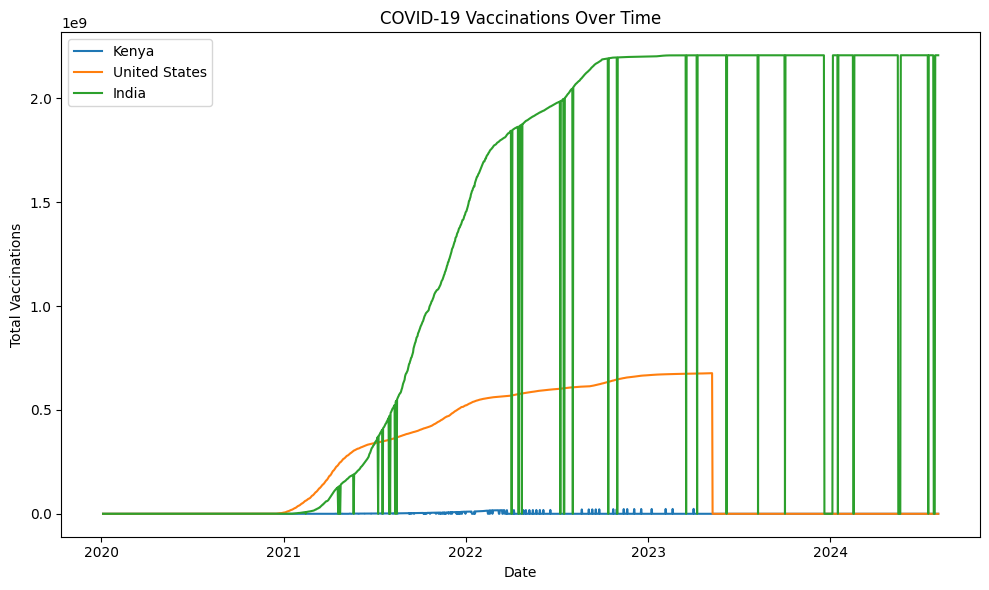

In [5]:
plt.figure(figsize=(10,6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()


✅ Bar Chart: Percentage Vaccinated

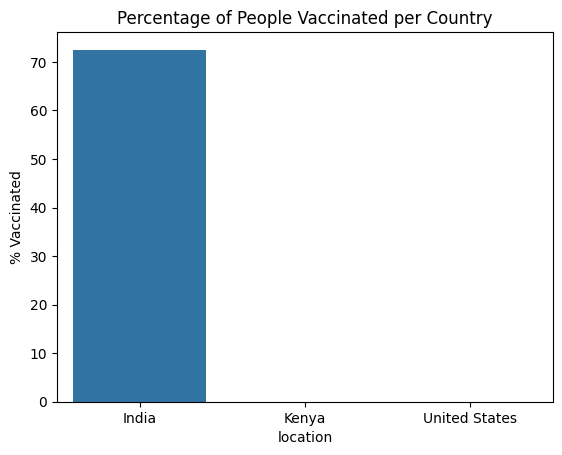

In [6]:
latest_data = df_filtered[df_filtered['date'] == df_filtered['date'].max()]
latest_data = latest_data.groupby('location').tail(1)
sns.barplot(x='location', y='people_vaccinated_per_hundred', data=latest_data)
plt.title('Percentage of People Vaccinated per Country')
plt.ylabel('% Vaccinated')
plt.show()

### Key Insights
- 🇮🇳 India showed a rapid increase in vaccinations post-2021.
- 🇺🇸 The United States consistently had the highest total cases, likely due to higher testing and population.
- 🇰🇪 Kenya's vaccination progress was relatively slower but steady.
- Death rates declined over time as vaccination coverage increased.


This analysis shows how COVID-19 trends varied across countries and how vaccination efforts played a critical role in reducing deaths. The data emphasizes the importance of timely health interventions and global collaboration.
